# Clustering - East West Airlines Passengers

### Perform clustering (hierarchical,K means clustering and DBSCAN) for the airlines data to obtain optimum number of clusters. Draw the inferences from the clusters obtained.

#### Data Description:

    The file EastWestAirlines contains information on passengers who belong to an airline’s frequent flier program. For each passenger the data include information on their mileage history and on different ways they accrued or spent miles in the last year. The goal is to try to identify clusters of passengers that have similar characteristics for the purpose of targeting different segments for different types of mileage offers.
    ID --Unique ID

    Balance--Number of miles eligible for award travel

    Qual_mile--Number of miles counted as qualifying for Topflight status

    cc1_miles -- Number of miles earned with freq. flyer credit card in the past 12 months:
    cc2_miles -- Number of miles earned with Rewards credit card in the past 12 months:
    cc3_miles -- Number of miles earned with Small Business credit card in the past 12 months:

    1 = under 5,000
    2 = 5,000 - 10,000
    3 = 10,001 - 25,000
    4 = 25,001 - 50,000
    5 = over 50,000

    Bonus_miles--Number of miles earned from non-flight bonus transactions in the past 12 months

    Bonus_trans--Number of non-flight bonus transactions in the past 12 months

    Flight_miles_12mo--Number of flight miles in the past 12 months

    Flight_trans_12--Number of flight transactions in the past 12 months

    Days_since_enrolled--Number of days since enrolled in flier program

    Award--whether that person had award flight (free flight) or not

### Project Background

The goal is to try to identify clusters of passengers that have similar characteristics for the purpose of targeting different segments for different types of mileage offers.

### Step-1 : Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import warnings as warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from scipy.cluster.hierarchy import linkage 
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import sklearn
from sklearn.neighbors import NearestNeighbors  
from sklearn.cluster import DBSCAN

### Step-2 : Descriptive analysis

### Step-2.1 : Working with Dataset

#### Loading the Dataset

In [2]:
# Passenger Travel data
psngr_data = pd.read_excel("EastWestAirlines.xlsx", sheet_name='data')

#### Exploring the dataset

In [3]:
# Displaying first ten records
psngr_data.head(10)

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
5,6,16420,0,1,1,1,0,0,0,0,6942,0
6,7,84914,0,3,1,1,27482,25,0,0,6994,0
7,8,20856,0,1,1,1,5250,4,250,1,6938,1
8,9,443003,0,3,2,1,1753,43,3850,12,6948,1
9,10,104860,0,3,1,1,28426,28,1150,3,6931,1


In [4]:
# Shape of the data
psngr_data.shape

(3999, 12)

In [5]:
# Summary of the data
psngr_data.describe()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [6]:
# Check the data types
psngr_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


#### Modifying the dataset

In [7]:
# Renaming the columns
psngr_data = psngr_data.rename(columns={"ID#":"ID","Balance":"Trvl_Bal","Qual_miles":"Qlfy_miles","Flight_miles_12mo":"Flight_miles","Flight_trans_12":"Flight_trans","Days_since_enroll":"Enroll_period","Award?":"Award"})
psngr_data.head(10)

,ID,Trvl_Bal,Qlfy_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles,Flight_trans,Enroll_period,Award
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
5,6,16420,0,1,1,1,0,0,0,0,6942,0
6,7,84914,0,3,1,1,27482,25,0,0,6994,0
7,8,20856,0,1,1,1,5250,4,250,1,6938,1
8,9,443003,0,3,2,1,1753,43,3850,12,6948,1
9,10,104860,0,3,1,1,28426,28,1150,3,6931,1


In [8]:
psngr_data = psngr_data.drop(['ID'],axis=1)
psngr_data

,Trvl_Bal,Qlfy_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles,Flight_trans,Enroll_period,Award
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1
3995,64385,0,1,1,1,981,5,0,0,1395,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1
3997,54899,0,1,1,1,500,1,500,1,1401,0


### Step-2.2 : Handling missing values

In [9]:
# Check for Null values
psngr_data.isnull().sum()

Trvl_Bal         0
Qlfy_miles       0
cc1_miles        0
cc2_miles        0
cc3_miles        0
Bonus_miles      0
Bonus_trans      0
Flight_miles     0
Flight_trans     0
Enroll_period    0
Award            0
dtype: int64

In [10]:
# Check for duplicate values
psngr_data[psngr_data.duplicated()].shape

(1, 11)

In [11]:
psngr_data[psngr_data.duplicated()]

,Trvl_Bal,Qlfy_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles,Flight_trans,Enroll_period,Award
3876,1000,0,1,1,1,0,0,0,0,1597,0


In [12]:
# As there is a duplicate observation, remove it from the dataset
psngr_data = psngr_data.drop_duplicates()
psngr_data.shape

(3998, 11)

In [13]:
psngr_data.reset_index(inplace=True,drop=True)
psngr_data

,Trvl_Bal,Qlfy_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles,Flight_trans,Enroll_period,Award
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
3993,18476,0,1,1,1,8525,4,200,1,1403,1
3994,64385,0,1,1,1,981,5,0,0,1395,1
3995,73597,0,3,1,1,25447,8,0,0,1402,1
3996,54899,0,1,1,1,500,1,500,1,1401,0


#### There are no duplicate values.

### Step-2.3 : Exploring data using Visualisation

#### Histogram

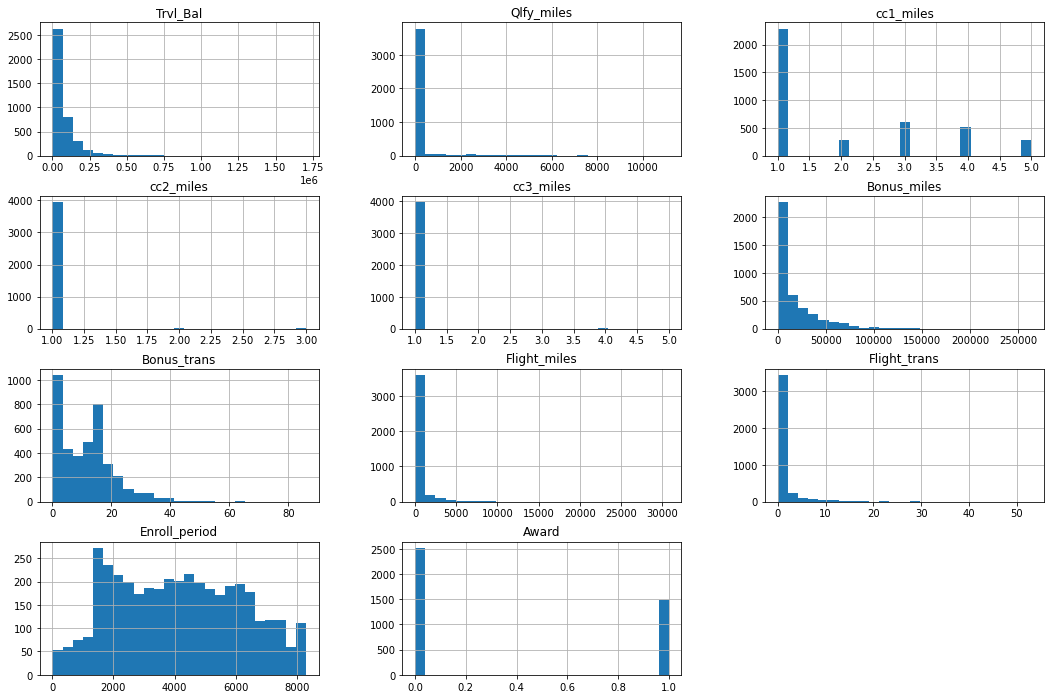

In [14]:
psngr_data.hist(figsize=(18,12),bins=25)
plt.show()

#### Boxplot

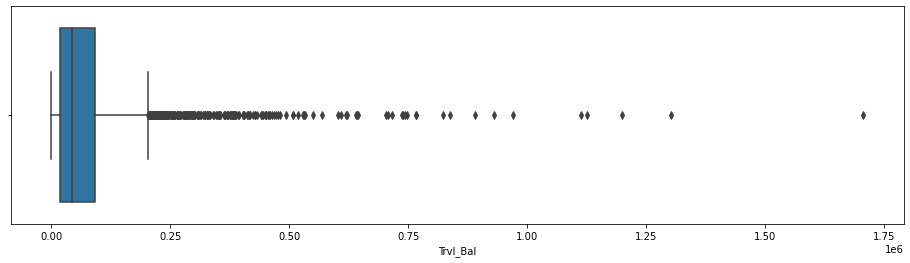

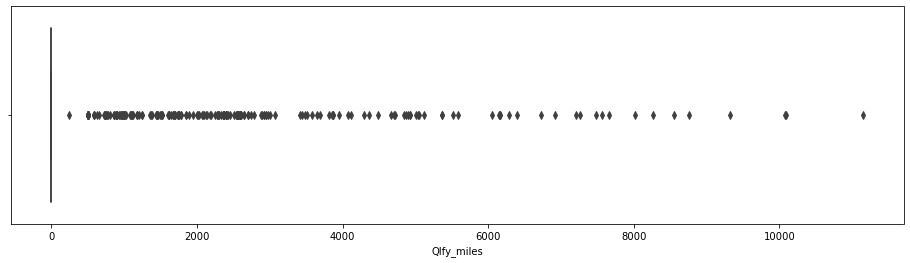

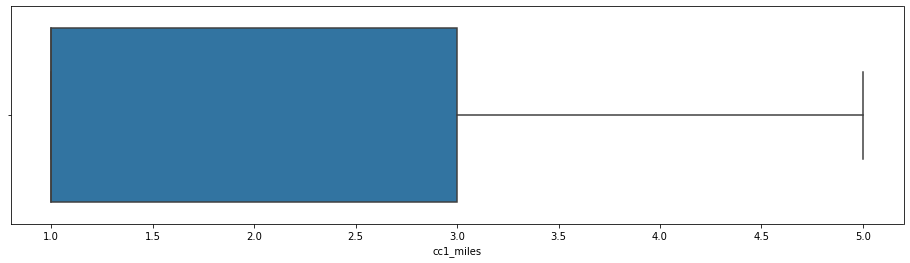

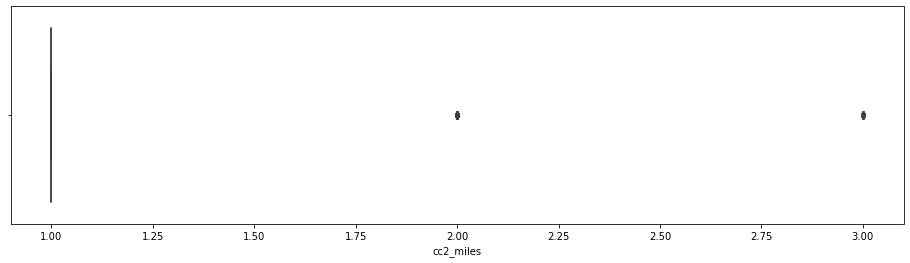

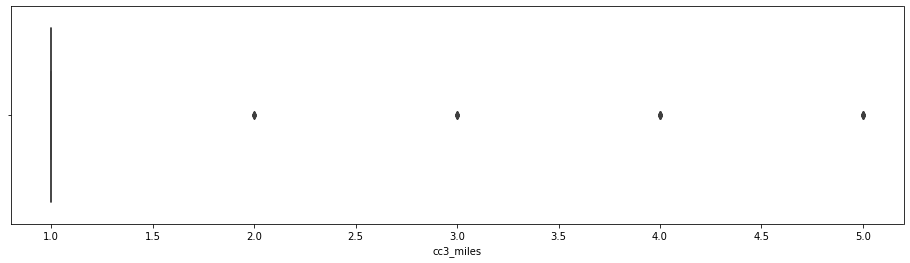

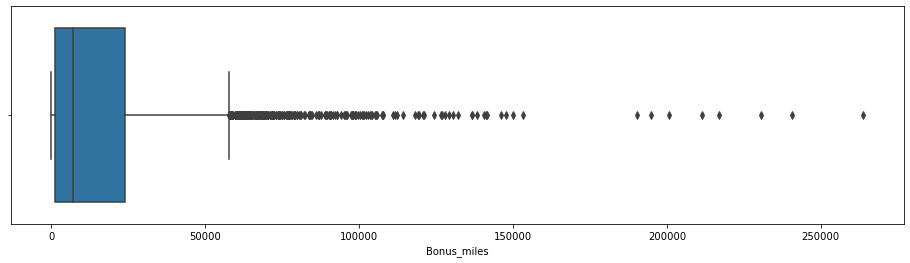

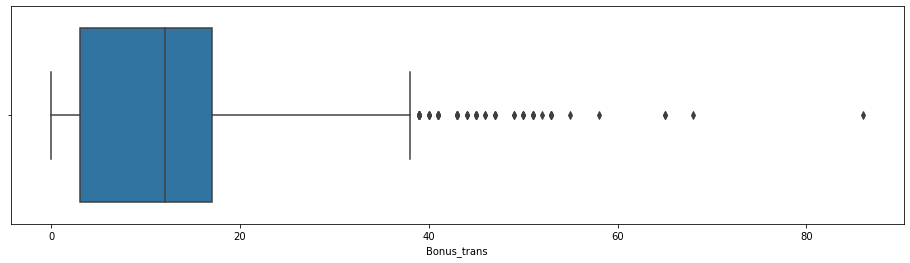

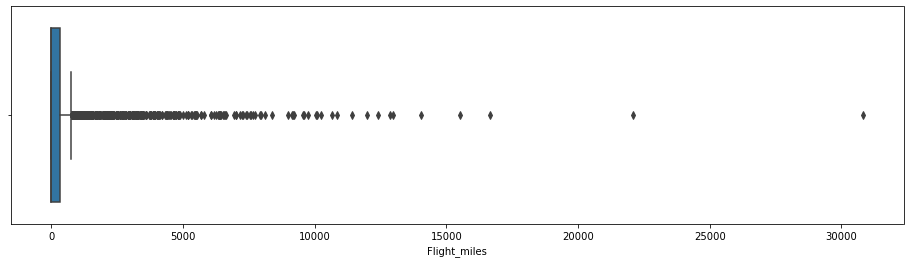

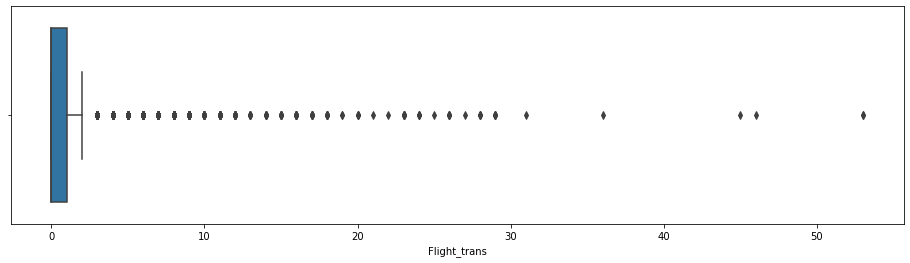

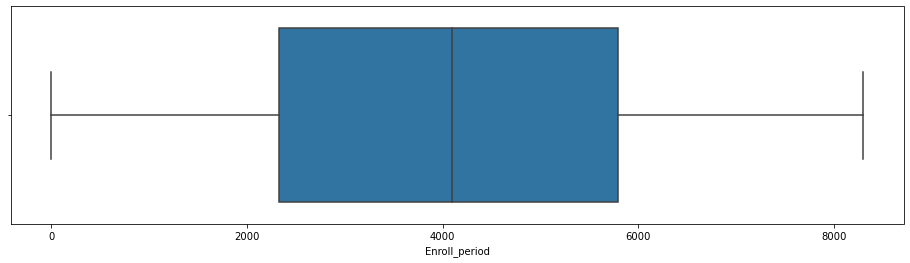

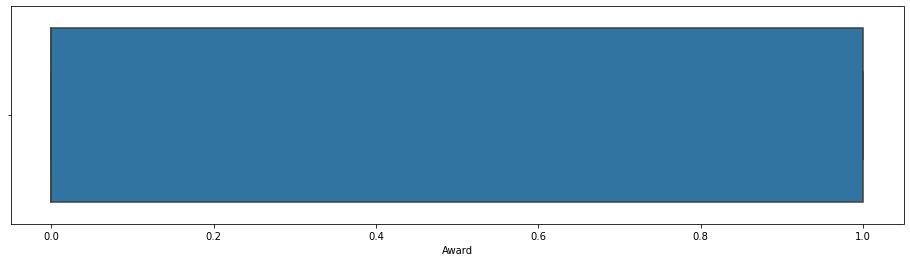

In [15]:
for feature in psngr_data.columns:
    plt.figure(figsize=(16,4))
    sb.boxplot(psngr_data[feature])

#### Comparing features using Boxplots

<AxesSubplot:>

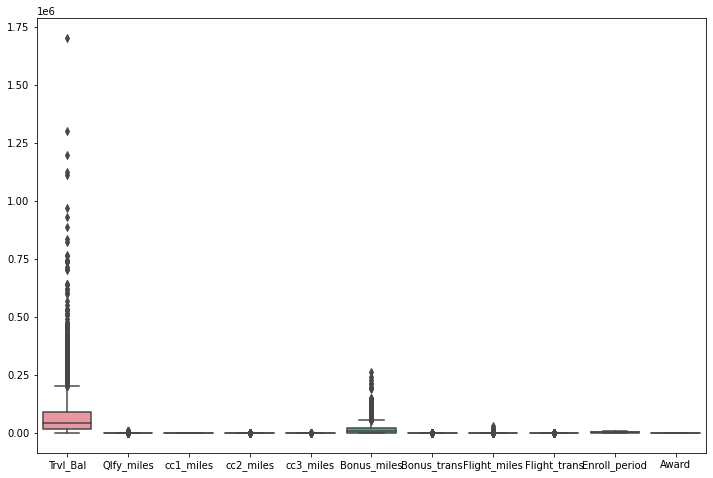

In [16]:
plt.figure(figsize=(12,8))
sb.boxplot(data=psngr_data)

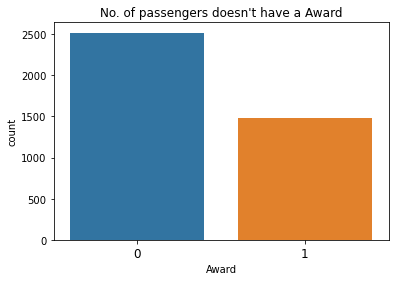

In [17]:
sb.countplot(x='Award', data=psngr_data, 
              order=psngr_data['Award'].value_counts().index)
plt.xticks(fontsize = 12)
plt.title("No. of passengers doesn't have a Award")
plt.show()

In [18]:
np.round(psngr_data['Award'].value_counts()/psngr_data.shape[0]*100,2)

0    62.96
1    37.04
Name: Award, dtype: float64

#### We can see that 63% of passengers doesn't have Award

#### Correlation and Heat map

In [19]:
# Checking for Correlation between variables
psngr_data.corr()

,Trvl_Bal,Qlfy_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles,Flight_trans,Enroll_period,Award
Trvl_Bal,1.000000,0.108696,0.338252,-0.008822,0.035234,0.403410,0.324797,0.217509,0.255656,0.262975,0.178380
Qlfy_miles,0.108696,1.000000,0.007896,-0.013928,-0.007782,0.030990,0.050678,0.126761,0.143990,0.017259,0.095228
cc1_miles,0.338252,0.007896,1.000000,-0.068247,0.060548,0.825177,0.608867,0.037310,0.041267,0.230674,0.335358
cc2_miles,-0.008822,-0.013928,-0.068247,1.000000,-0.006168,-0.003987,0.064381,0.010590,0.028276,-0.005838,0.005314
cc3_miles,0.035234,-0.007782,0.060548,-0.006168,1.000000,0.204136,0.097312,-0.001783,-0.001122,0.010815,0.023474
Bonus_miles,0.403410,0.030990,0.825177,-0.003987,0.204136,1.000000,0.603114,0.183492,0.185211,0.210232,0.373421
Bonus_trans,0.324797,0.050678,0.608867,0.064381,0.097312,0.603114,1.000000,0.377190,0.432341,0.160953,0.333747
Flight_miles,0.217509,0.126761,0.037310,0.010590,-0.001783,0.183492,0.377190,1.000000,0.869189,0.037178,0.217671
Flight_trans,0.255656,0.143990,0.041267,0.028276,-0.001122,0.185211,0.432341,0.869189,1.000000,0.059161,0.247862
Enroll_period,0.262975,0.017259,0.230674,-0.005838,0.010815,0.210232,0.160953,0.037178,0.059161,1.000000,0.187936


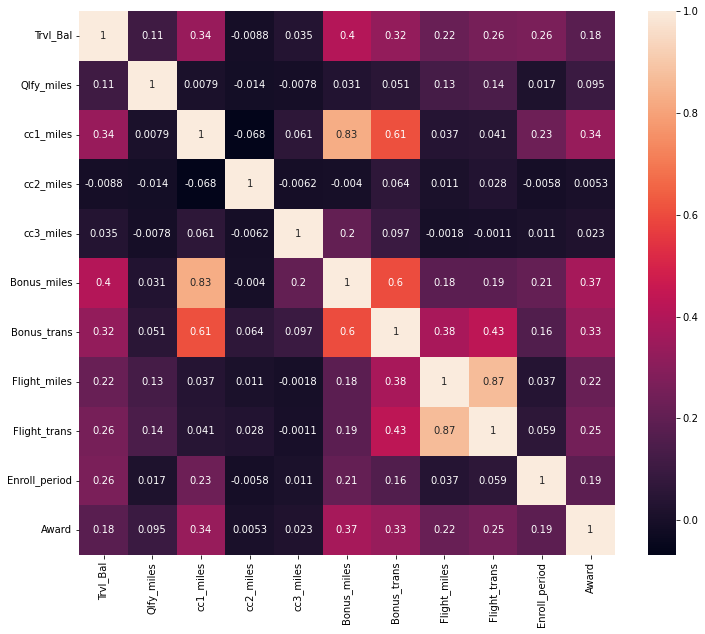

In [20]:
plt.figure(figsize=(12,10))
sb.heatmap(psngr_data.corr(),annot=True)
plt.show()

#### Observation
+ We can see that Flight_miles and Flight_trans have strong correlation.
+ cc1_miles is strongly related to Bonus_miles.
+ cc1_miles is strongly related to Bonus_trans.
+ Bonus_miles and Bonus_trans are strongly correlated.

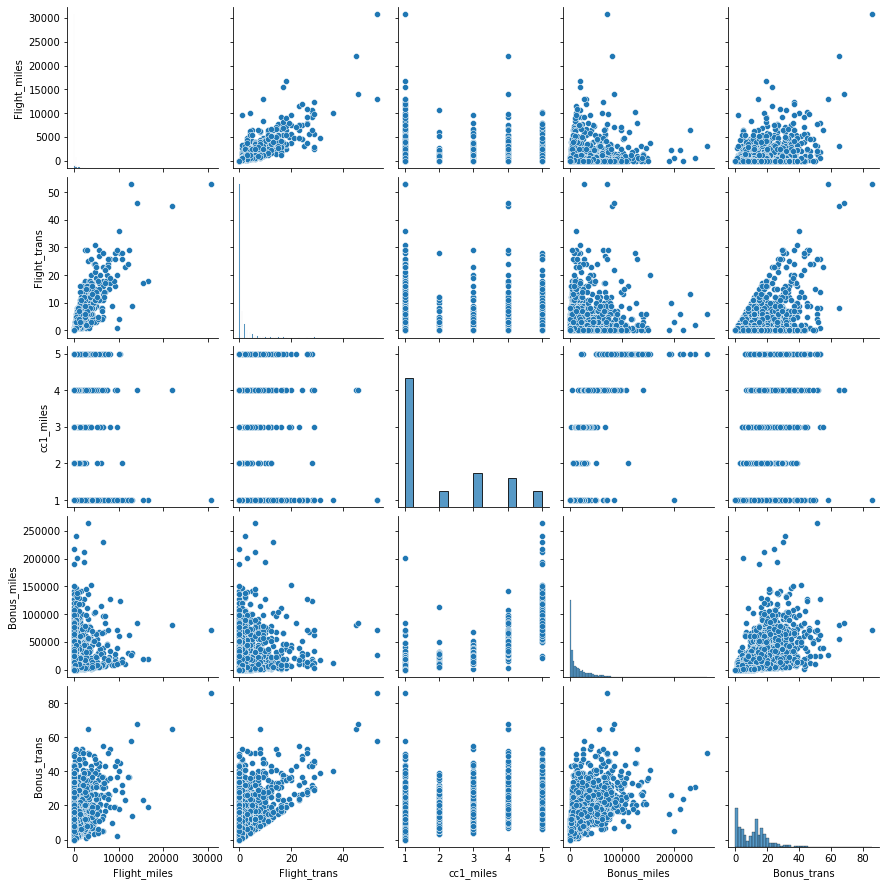

In [21]:
sb.pairplot(data=psngr_data[["Flight_miles","Flight_trans","cc1_miles","Bonus_miles","Bonus_trans"]])

### Step-3 : Pre-Processing the Data

### Step-3.1 : Standardising the data

In [32]:
standard_scaler = StandardScaler()
psngr_data_std = standard_scaler.fit_transform(psngr_data)
psngr_data_std

array([[-4.51293870e-01, -1.86322793e-01, -7.69731660e-01, ...,
        -3.62219103e-01,  1.39523468e+00, -7.67071631e-01],
       [-5.39604653e-01, -1.86322793e-01, -7.69731660e-01, ...,
        -3.62219103e-01,  1.37973643e+00, -7.67071631e-01],
       [-3.20192202e-01, -1.86322793e-01, -7.69731660e-01, ...,
        -3.62219103e-01,  1.41170157e+00, -7.67071631e-01],
       ...,
       [-2.23153612e-04, -1.86322793e-01,  6.82893866e-01, ...,
        -3.62219103e-01, -1.31599028e+00,  1.30365921e+00],
       [-1.85776026e-01, -1.86322793e-01, -7.69731660e-01, ...,
        -9.85832074e-02, -1.31647460e+00, -7.67071631e-01],
       [-7.00646048e-01, -1.86322793e-01, -7.69731660e-01, ...,
        -3.62219103e-01, -1.31792757e+00, -7.67071631e-01]])

### Step-3.2 : Normalising the data

In [31]:
min_max = MinMaxScaler()
psngr_data_norm = min_max.fit_transform(psngr_data)
psngr_data_norm

array([[0.01650773, 0.        , 0.        , ..., 0.        , 0.84374246,
        0.        ],
       [0.01128788, 0.        , 0.        , ..., 0.        , 0.83988425,
        0.        ],
       [0.02425685, 0.        , 0.        , ..., 0.        , 0.84784181,
        0.        ],
       ...,
       [0.0431695 , 0.        , 0.5       , ..., 0.        , 0.16879672,
        1.        ],
       [0.03220189, 0.        , 0.        , ..., 0.01886792, 0.16867615,
        0.        ],
       [0.00176908, 0.        , 0.        , ..., 0.        , 0.16831444,
        0.        ]])

#### However both give almost same result. So adopt Normalised data.

### Step-4 : Build Clustering model for Normalised data

### Step-4.1 : Using Hierarchical Clustering model

#### As the no. of observations are more, Hierarchical clustering is not suggested. But anyhow let us see how it works.

#### Step-4.1.1 : Creating Linkage to determine number of clusters

In [24]:
z = linkage(psngr_data_norm, method="average",metric="euclidean")
plt.figure(figsize=(250, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Index')
plt.ylabel('Distance')
sch.dendrogram(z)
plt.show()     


KeyboardInterrupt



#### Here we can see that there are 4 no . of clusters. But it is very difficult to identify.

#### Step-4.1.2 : Buliding the Clustering model

#### Before selecting no. of clusters, check Silhouette score by varying number of clusters in the model build. Silhouette score gives the accuracy of a model.

In [ ]:
for nc in range(2,11):
    h_cluster = AgglomerativeClustering(n_clusters=nc, linkage='average',affinity = "euclidean").fit(psngr_data_norm)
    cluster_labels=pd.Series(h_cluster.labels_)
    slht_scr= sklearn.metrics.silhouette_score(psngr_data_norm, cluster_labels)
    print("For n_clusters =", nc,"The average silhouette_score is :", slht_scr)

#### Model with 4 no. of clusters has the highest accuracy. Hence build the model with 4 no. of clusters.

In [ ]:
h_cluster = AgglomerativeClustering(n_clusters=4, linkage='average',affinity = "euclidean").fit(psngr_data_norm) 
cluster_labels=pd.Series(h_cluster.labels_)
cluster_labels
psngr_data['clust']=cluster_labels
psngr_data  

In [ ]:
cluster_labels

#### Step-4.1.3 : Analysing the results obtained from the model

In [ ]:
psngr_data.groupby(psngr_data.clust).mean()   

#### We can see that 4 no. of clusters are formed.

#### Following are the Different Passengers in each cluster

In [ ]:
h_cluster_0 = psngr_data[(psngr_data.clust==0)]
h_cluster_0   

In [ ]:
h_cluster_1 = psngr_data[(psngr_data.clust==1)]
h_cluster_1   

In [ ]:
h_cluster_2 = psngr_data[(psngr_data.clust==2)]
h_cluster_2   

In [ ]:
h_cluster_3 = psngr_data[(psngr_data.clust==3)]
h_cluster_3   

In [ ]:
plt.style.use(['classic']) 
plt.figure(figsize=(12,6))
psngr_data.plot(x="Flight_miles",y ="Flight_trans",c=cluster_labels,label = 'Cluster Number',kind="scatter",s=100 ,cmap=plt.cm.coolwarm) 
plt.title('Clusters using Hierarchical Clustering') 
plt.show()

#### We can see that some of the observations of one cluster are overlapping with the other cluster. So let us check the accuracy of the model in classifying data by evaluating Silhouette score.

#### Evaluating accuracy of the model using Silhouette score

In [ ]:
# Silhouette score ranges from -1 to 1. '-1' indicates model is not good. '1' indicates model is best. 
# '0' indicates clusters are overlapping
slht_scr_hc = sklearn.metrics.silhouette_score(psngr_data_norm, cluster_labels)
slht_scr_hc

#### The score is closer to '0'. It indicates that the model is not that accurate at classifying the data, as clusters are overlapping. So try other methods of clustering.

### Step-4.2 : Using K-means Clustering model

#### Step-4.2.1 : Determing no. of clusters using 'Elbow method'

In [ ]:
from sklearn.cluster import KMeans
fig = plt.figure(figsize=(10, 8))
WCSS = []
for i in range(1, 11):
    k_cluster = KMeans(n_clusters=i)
    k_cluster.fit(psngr_data_norm)
    WCSS.append(k_cluster.inertia_)
plt.plot(range(1, 11), WCSS)
plt.title('The Elbow Method')
plt.ylabel('WCSS')
plt.xlabel('Number of Clusters')

plt.show()  

#### Therefore from the elbow curve, we can observe that the number of clusters are 6.

#### Step-4.2.2 : Buliding the Clustering model

#### Before selecting no. of clusters, check Silhouette score by varying number of clusters in the model build. Silhouette score gives the accuracy of a model.

In [ ]:
# Silhouette score ranges from -1 to 1. '-1' indicates model is not good. '1' indicates model is best. 
# '0' indicates clusters are overlapping
for nc in range(2,11):
    k1_cluster = KMeans(n_clusters=nc, random_state=0)
    y1_kmeans = k1_cluster.fit_predict(psngr_data_norm)
    slht_scr= sklearn.metrics.silhouette_score(psngr_data_norm, y1_kmeans)
    print("For n_clusters =", nc,"The average silhouette_score is :", slht_scr)

#### Model with 2 no. of clusters has the highest accuracy. Hence build the model with 2 no. of clusters.

In [ ]:
k_cluster = KMeans(n_clusters=2)
y_kmeans = k_cluster.fit_predict(psngr_data_norm)  

In [ ]:
y_kmeans

In [ ]:
k_cluster.labels_

In [ ]:
k_cluster.cluster_centers_

In [ ]:
# Within cluster sum of squares or variance
k_cluster.inertia_

In [ ]:
ks = pd.Series(y_kmeans) 
psngr_data['clust']=ks
psngr_data

#### Step-4.2.3 : Analysing the results obtained from the model

In [ ]:
psngr_data.groupby(psngr_data.clust).mean()   

#### Following are the Different Passengers in each cluster

In [ ]:
k_cluster_0 = psngr_data[(psngr_data.clust==0)]
k_cluster_0   

In [ ]:
k_cluster_1 = psngr_data[(psngr_data.clust==1)]
k_cluster_1   

In [ ]:
plt.style.use(['classic']) 
plt.figure(figsize=(12,6))
psngr_data.plot(x="Flight_miles",y ="Flight_trans",c=k_cluster.labels_,label = 'Cluster Number',kind="scatter",s=100 ,cmap=plt.cm.coolwarm) 
plt.title('Clusters using KMeans clustering')
plt.show()

#### We can see that some of the observations of one cluster are overlapping with the other cluster. So let us check the accuracy of the model in classifying data by evaluating Silhouette score.

#### Evaluating accuracy of the model using Silhouette score

In [ ]:
# Silhouette score ranges from -1 to 1. '-1' indicates model is not good. '1' indicates model is best. 
# '0' indicates clusters are overlapping
slht_scr_kc = sklearn.metrics.silhouette_score(psngr_data_norm, k_cluster.labels_) 
slht_scr_kc

#### The score is closer to '0'. It indicates that the model is not that accurate at classifying the data, as clusters are overlapping. So try other methods of clustering.

### Step-4.3 : DB Scan Clustering model

#### Step-4.3.1 : Determining epsilon value

In [28]:
psngr_data_norm

array([[0.01650773, 0.        , 0.        , ..., 0.        , 0.84374246,
        0.        ],
       [0.01128788, 0.        , 0.        , ..., 0.        , 0.83988425,
        0.        ],
       [0.02425685, 0.        , 0.        , ..., 0.        , 0.84784181,
        0.        ],
       ...,
       [0.0431695 , 0.        , 0.5       , ..., 0.        , 0.16879672,
        1.        ],
       [0.03220189, 0.        , 0.        , ..., 0.01886792, 0.16867615,
        0.        ],
       [0.00176908, 0.        , 0.        , ..., 0.        , 0.16831444,
        0.        ]])

In [29]:
# Nearest neighbours = 2x(no. of Dimensions/columns)
nn = NearestNeighbors(n_neighbors=22)
nn = nn.fit(psngr_data_norm)
distances, indices = nn.kneighbors(psngr_data_norm)  

In [30]:
distances

array([[0.        , 0.00871531, 0.00982329, ..., 0.02932871, 0.02945634,
        0.03071875],
       [0.        , 0.01212297, 0.01331785, ..., 0.03473729, 0.03509134,
        0.03514045],
       [0.        , 0.01857767, 0.01872551, ..., 0.04552297, 0.04668783,
        0.04773513],
       ...,
       [0.        , 0.02591961, 0.04945468, ..., 0.1198017 , 0.11996173,
        0.12060709],
       [0.        , 0.0264501 , 0.02784951, ..., 0.03925554, 0.03970704,
        0.03979314],
       [0.        , 0.00038605, 0.0027753 , ..., 0.0198035 , 0.02220023,
        0.02328785]])

In [ ]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)  

#### The curve takes a sharp bend at a value of 0.2. Hence the epsilon value is 0.2.

#### Step-4.3.2 : Building the DB Scan clustering model

In [ ]:
# min_samples=(no. of Dimensions/columns)+1
d_cluster = DBSCAN(eps=0.2, min_samples=12)
d_cluster.fit(psngr_data_norm)                      

In [ ]:
d_cluster.labels_ 

In [ ]:
ds = pd.Series(d_cluster.labels_) 
psngr_data['clust']=ds
psngr_data

#### Step-4.3.3 : Analysing the results obtained from the model

In [ ]:
psngr_data.groupby(psngr_data.clust).mean()

#### Following are the Different Passengers in each cluster

In [ ]:
array = np.sort(psngr_data["clust"].unique())
list = array.tolist()
for i in list:
    d_cluster_n = psngr_data[(psngr_data.clust==i)]
    print("\nThe following are the passengers in Cluster-'"+str(i)+"'\n\n",d_cluster_n)

#### Clusters with label '-1' are generally categorised as Outliers.

In [ ]:
plt.style.use(['classic']) 
plt.figure(figsize=(12,6))
psngr_data.plot(x="Flight_miles",y ="Flight_trans",c=d_cluster.labels_,label = 'Cluster Number',kind="scatter",s=100 ,cmap=plt.cm.coolwarm) 
plt.title('Clusters using DB Scan Clustering')  
plt.show()

#### We can see that some of the observations of one cluster are overlapping with the other cluster. So let us check the accuracy of the model in classifying data by evaluating Silhouette score.

#### Evaluating accuracy of the model using Silhouette score

In [ ]:
# Silhouette score ranges from -1 to 1. '-1' indicates model is not good. '1' indicates model is best. 
# '0' indicates clusters are overlapping
slht_scr_dc = sklearn.metrics.silhouette_score(psngr_data_norm, d_cluster.labels_) 
slht_scr_dc

#### Observation
+ The Silhouette score is closer to '0'. Hence DB Scan clustering model is not able to classify the dataset accurately. However it detected outliers.

### Step-5 : Comparing all the models using Silhouette score

In [ ]:
print("The Silhouette score of Hierarchical Clustering:",slht_scr_hc)
print("The Silhouette score of KMeans Clustering:",slht_scr_kc)
print("The Silhouette score of DB Scan Clustering:",slht_scr_dc)

#### Here we can see that the Silhouette score for KMeans clustering is more than other two models.

### Step-6 : Conclusion

#### Hence the Kmeans clustering model can be selected to classify the dataset.

In [ ]:
plt.style.use(['classic']) 
plt.figure(figsize=(12,6))
psngr_data.plot(x="Flight_miles",y ="Flight_trans",c=k_cluster.labels_,label = 'Cluster Number',kind="scatter",s=100 ,cmap=plt.cm.coolwarm) 
plt.title('Clusters using KMeans clustering')
plt.show()

### Step-7 : Recommendation

#### Maximum award given to cluster '0' in the past. Airlines have to add future schemes for cluster '1'  members on different bonus points & card transaction bonus.